In [1]:
path="/home/shubham-sakha/Desktop/DataScience/ShubhamProject/Cricket-Highlights-Generation-master/"
filename="Final, T10 League Season 2.wav"

In [2]:
import librosa
x, sr = librosa.load(path+filename) 

In [3]:
int(librosa.get_duration(x, sr)/60)

38

In [4]:
max_slice=5
window_length = max_slice * sr

In [5]:
import IPython.display as ipd
a=x[36*window_length:37*window_length]
ipd.Audio(a, rate=sr)

In [6]:
energy = sum(abs(a**2))
print(energy)

733.9085210281042


In [7]:
len(a)

110250

In [8]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(14, 8))
ax1 = fig.add_subplot(211)
ax1.set_xlabel('time')
ax1.set_ylabel('Amplitude')
ax1.plot(a)

In [9]:
import numpy as np
energy = np.array([sum(abs(x[i:i+window_length]**2)) for i in range(0, len(x), window_length)])

In [10]:
energy

array([ 400.70387107, 1338.71893706,  657.91264708,  541.49949167,
        422.78405695,  745.12187751,  479.34549895,  470.17555954,
        455.45725092,  305.735393  ,  248.59632889,  384.50981263,
        226.55504763,  332.66609763,  405.05218368,  515.4695637 ,
        424.2159444 ,  428.40304687,  458.06695969,  338.42989979,
        226.57251899,  351.11428913,  296.4689613 ,  638.24701835,
        297.57156762,  803.31601431,  782.45837362,  638.77497824,
        529.00695276,  766.25321971,  650.54567967,  533.66167203,
        276.93926745,  467.18491702,  124.51365378, 1161.04804971,
        733.90852103,  877.05401674,  730.15186941,  928.8619096 ,
        854.37926391,  687.48784642,  470.85002986,  375.31062946,
        189.01541074,  136.21467488,  322.29745553,  599.11920774,
        275.35637721,  416.98602262,  589.00496159,  320.72095028,
        255.72418007,  608.03964306,  672.1111543 ,  683.31507491,
        588.06337381,  623.48251797,  673.87595243,  286.44261

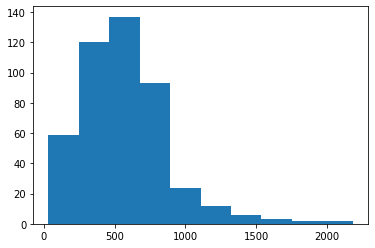

In [11]:
import matplotlib.pyplot as plt
plt.hist(energy)
plt.show()

In [12]:
import pandas as pd
df=pd.DataFrame(columns=['energy','start','end'])

In [13]:
df

,energy,start,end


In [14]:
thresh=600
row_index=0
for i in range(len(energy)):
    value=energy[i]
    if(value>=thresh):
        i=np.where(energy == value)[0]
        df.loc[row_index,'energy']=value
        df.loc[row_index,'start']=i[0] * 5
        df.loc[row_index,'end']=(i[0]+1) * 5
        row_index= row_index + 1

In [15]:
df

,energy,start,end
0,1338.72,5,10
1,657.913,10,15
2,745.122,25,30
3,638.247,115,120
4,803.316,125,130
5,782.458,130,135
6,638.775,135,140
7,766.253,145,150
8,650.546,150,155
9,1161.05,175,180


In [16]:
temp=[]
i=0
j=0
n=len(df) - 2
m=len(df) - 1
while(i<=n):
    j=i+1
    while(j<=m):
        if(df['end'][i] == df['start'][j]):
            df.loc[i,'end'] = df.loc[j,'end']
            temp.append(j)
            j=j+1
        else:
            i=j
            break      

In [17]:
df

,energy,start,end
0,1338.72,5,15
1,657.913,10,15
2,745.122,25,30
3,638.247,115,120
4,803.316,125,140
5,782.458,130,135
6,638.775,135,140
7,766.253,145,155
8,650.546,150,155
9,1161.05,175,210


In [18]:
df.drop(temp,axis=0,inplace=True)
df

,energy,start,end
0,1338.72,5,15
2,745.122,25,30
3,638.247,115,120
4,803.316,125,140
7,766.253,145,155
9,1161.05,175,210
16,608.04,265,280
19,623.483,285,295
21,645.391,340,345
22,780.675,355,370


In [19]:
from moviepy.video.io.ffmpeg_tools import ffmpeg_extract_subclip
start=np.array(df['start'])
end=np.array(df['end'])
for i in range(len(df)):
    if(i!=0):
        start_lim = start[i] - 5
    else:
        start_lim = start[i] 
    end_lim   = end[i]   
    filename="/home/shubham-sakha/Desktop/DataScience/ShubhamProject/Cricket-Highlights-Generation-master/video/" + str(i+1) + ".mp4"
    ffmpeg_extract_subclip(path+"Final, T10 League Season 2.mp4",start_lim,end_lim,targetname=filename)


[MoviePy] Running:
>>> /home/shubham-sakha/anaconda3/bin/ffmpeg -y -i /home/shubham-sakha/Desktop/DataScience/ShubhamProject/Cricket-Highlights-Generation-master/Final, T10 League Season 2.mp4 -ss 5.00 -t 10.00 -vcodec copy -acodec copy /home/shubham-sakha/Desktop/DataScience/ShubhamProject/Cricket-Highlights-Generation-master/video/1.mp4
... command successful.

[MoviePy] Running:
>>> /home/shubham-sakha/anaconda3/bin/ffmpeg -y -i /home/shubham-sakha/Desktop/DataScience/ShubhamProject/Cricket-Highlights-Generation-master/Final, T10 League Season 2.mp4 -ss 20.00 -t 10.00 -vcodec copy -acodec copy /home/shubham-sakha/Desktop/DataScience/ShubhamProject/Cricket-Highlights-Generation-master/video/2.mp4
... command successful.

[MoviePy] Running:
>>> /home/shubham-sakha/anaconda3/bin/ffmpeg -y -i /home/shubham-sakha/Desktop/DataScience/ShubhamProject/Cricket-Highlights-Generation-master/Final, T10 League Season 2.mp4 -ss 110.00 -t 10.00 -vcodec copy -acodec copy /home/shubham-sakha/Desktop